In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np

In [0]:
# np.random.seed(0) 
# tf.set_random_seed(0) 

In [0]:
a_gt = 2
b_gt = 1
points_count = 10
points_count_half = points_count // 2
x = np.random.uniform(0, 20, points_count) 
eps_plus = np.random.uniform(1, 10, points_count_half)
eps_minus = np.random.uniform(-10, -1, points_count_half)
eps = np.concatenate([eps_plus, eps_minus])
labels = np.concatenate([np.full(eps_plus.shape[0], 1), np.full(eps_minus.shape[0], 0)])
y = a_gt * x + b_gt + eps
features = np.array(list(zip(x, y)))
# print(x)
# print(y)
# print(labels)
# print(features)


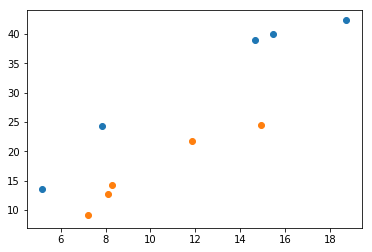

In [90]:
plt.scatter(x[0:points_count_half], y[0:points_count_half], label="1") 
plt.scatter(x[points_count_half:points_count], y[points_count_half:points_count], label="0")
plt.show() 

In [0]:
X = tf.placeholder(dtype="float", shape=(2), name="X") 
Y = tf.placeholder(dtype="float", shape=(1), name="Y")

W = tf.Variable(tf.zeros(2), name = "W") 
b = tf.Variable(tf.zeros(1), name = "b")

pred = tf.math.sigmoid(tf.add(tf.reduce_sum(tf.multiply(W, X)), b))

# loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=pred, labels=Y)
loss = tf.losses.mean_squared_error(predictions=pred, labels=Y)

learning_rate = 1.0e-2
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

init = tf.global_variables_initializer()

epochs_count = 100

# print(features.shape)

In [92]:
with tf.Session() as sess:
  sess.run(init)
  for epoch in range(epochs_count):
    order = np.random.permutation(features.shape[0])
    for i in order:    
      sess.run(optimizer, feed_dict = {X : features[i], Y : np.array([labels[i],])})
    loss_val = sess.run(loss, feed_dict = {X : features[i], Y : np.array([labels[i],])})
    print("epoch:", epoch, "loss:", loss_val)
    
  weights = sess.run(W) 
  bias = sess.run(b)

epoch: 0 loss: 0.2505383
epoch: 1 loss: 0.31457275
epoch: 2 loss: 0.12175732
epoch: 3 loss: 8.2079736e-05
epoch: 4 loss: 0.11597995
epoch: 5 loss: 0.19366512
epoch: 6 loss: 0.06736862
epoch: 7 loss: 0.0017453887
epoch: 8 loss: 0.032840513
epoch: 9 loss: 5.7240373e-05
epoch: 10 loss: 0.109414086
epoch: 11 loss: 0.07934721
epoch: 12 loss: 0.07750016
epoch: 13 loss: 0.021167737
epoch: 14 loss: 0.1655016
epoch: 15 loss: 0.08771095
epoch: 16 loss: 0.00010240062
epoch: 17 loss: 0.008817808
epoch: 18 loss: 0.024689684
epoch: 19 loss: 0.01578249
epoch: 20 loss: 0.0041422583
epoch: 21 loss: 0.0052544596
epoch: 22 loss: 0.023729187
epoch: 23 loss: 0.048416935
epoch: 24 loss: 0.050882425
epoch: 25 loss: 0.033865422
epoch: 26 loss: 0.06777699
epoch: 27 loss: 9.712872e-06
epoch: 28 loss: 0.10814236
epoch: 29 loss: 0.0016307322
epoch: 30 loss: 0.012995326
epoch: 31 loss: 0.006260556
epoch: 32 loss: 0.005133735
epoch: 33 loss: 0.025986556
epoch: 34 loss: 0.027103623
epoch: 35 loss: 0.005771748
epoch:

[-1.1016948  0.5513353]
[-0.14593472]
a predicted: 1.9982302 a ground truth: 2
b predicted: 0.26469323 b ground truth: 1


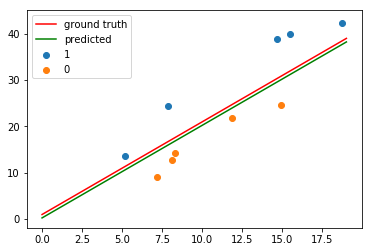

In [93]:
print(weights)
print(bias)

a_pred = -weights[0] / weights[1]
b_pred = -bias[0] / weights[1]

print("a predicted:", a_pred, "a ground truth:", a_gt)
print("b predicted:", b_pred, "b ground truth:", b_gt)

x_ = np.array(range(0, 20))
y_gt_ = a_gt * x_ + b_gt
y_pred_ = a_pred * x_ + b_pred

plt.plot(x_, y_gt_, label="ground truth", color="r")
plt.plot(x_, y_pred_, label="predicted", color="g")
plt.scatter(x[0:points_count_half], y[0:points_count_half], label="1") 
plt.scatter(x[points_count_half:points_count], y[points_count_half:points_count], label="0")
plt.legend()
plt.show() 